#  <span style="color: #2A8E3C;"> **Lift & Lead - Análisis de Mercado** </span>

## <span style="color: #2A8E3C;"> **Análisis de mercado para la apertura de centros especializados de Halterofilia** </span>

<span style="color: #E3B800;"> ***Lift & Lead***, </span> es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de <span style="color: #E3B800;"> ***Lift & Lead***, </span>  busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. <span style="color: #E3B800;"> **Fase 1**, </span> : Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. <span style="color: #E3B800;"> **Fase 2**, </span> Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

![Halterofilia](images/allfreeweight.png)

# <span style="color: #2A8E3C;">  **Parte 1.** Disponemos de la información </span> 

## <span style="color: #2A8E3C;">  Paso 1. Importar librerías </span> 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

import os

c:\Users\Usuario\anaconda3\envs\KERNEL_CON_PANDAS\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## <span style="color: #2A8E3C;">  Paso 2. Cargar datos </span>

In [2]:
path = 'data/' 

ficheros = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

dict_datos = {}
for file in ficheros:
    if file.endswith(('.csv', '.xlsx')):
        print(file)
        if file.endswith('.csv'):
            df = pd.read_csv(path + file)
        else:
            df = pd.read_excel(path + file)
        dict_datos[file] = df

Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv


## <span style="color: #2A8E3C;">  Paso 3. Exploración inicial </span> 

Creamos una función que nos permitirá hacer una exploración inicial de los datos, para ver si hay que hacer algún tratamiento previo a la limpieza de los datos y la aplicamos directamente al dictado dataframes.

In [5]:

def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')
       
        print("¿Hay filas duplicadas en el conjunto de datos?")
        dup_count = df.duplicated().sum()
        has_duplicates = dup_count > 0
        print(f"\tExisten duplicados: {has_duplicates}")
        print(f"\tNúmero total de filas duplicadas: {dup_count}")
        
        if has_duplicates and dup_count <= 5:
            print("\tFilas duplicadas (mostrando hasta 5):")
            display(df[df.duplicated(keep=False)].head())
        print('\n########################################################################################')

In [ ]:
for k, v in dict_datos.items():
    print("_"*len(k))
    print(k)
    print("_"*len(k))
    exploracion_inicial(df= v)

_____________________________________________________________
Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
_____________________________________________________________
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
18,87 kg (12.04),Xeniya Pasjina Rusia 110 + 132 = 242,Diana Mstiyeva Rusia 110 + 130 = 240,Sarah Fischer Austria 102 + 129 = 231,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
13,59 kg (08.04),Rebeka Koha Letonia 101 + 120 = 221,Tatiana Aleyeva Rusia 94 + 120 = 214,Alexandra Kozlova Rusia 96 + 117 = 213,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
14,64 kg (09.04),Loredana Toma Rumania 111 + 128 = 239,Irina Lepșa Rumania 102 + 127 = 229,Zoe Smith Reino Unido 96 + 128 = 224,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Año
	 - Genero

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

,Eventos,Oro,Plata,Bronce,Año,Genero
count,20,20,20,20,20.0,20
unique,20,20,20,20,,2
top,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,,Masculino
freq,1,1,1,1,,10
mean,,,,,2019.0,
std,,,,,0.0,
min,,,,,2019.0,
25%,,,,,2019.0,
50%,,,,,2019.0,
75%,,,,,2019.0,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################
_____________________________________________________________
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv
_____________________________________________________________
¿Cuántas filas y columnas hay en el conjunto d

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2020,Masculino
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2020,Masculino
9,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2020,Masculino
10,45 kg (03.04),Nadezhda Nguen Bulgaria 72 + 83 = 155[n 1]​,Ivana Petrova Bulgaria 67 + 85 = 152[n 1]​,Melisa Güneş Turquía 68 + 83 = 151[n 1]​,2020,Femenino



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Año
	 - Genero

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

,Eventos,Oro,Plata,Bronce,Año,Genero
count,20,20,20,20,20.0,20
unique,19,20,20,20,,2
top,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,,Masculino
freq,2,1,1,1,,10
mean,,,,,2020.0,
std,,,,,0.0,
min,,,,,2020.0,
25%,,,,,2020.0,
50%,,,,,2020.0,
75%,,,,,2020.0,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


No hay nulos ni duplicados, pero vemos que en cada columna hay muchos datos que deberíamos separar en distintas columnas para analizarlos de manera correcta y caracteres extraños 

## <span style="color: #2A8E3C;"> Paso 4. Crear un único dataframe con los datos de 2019 y 2020 </span> 

Como tienen la misma estructura, los concatenaremos en un mismo dataframe para proceder a la limpieza de los datos.

In [7]:
df = pd.concat(dict_datos.values(), ignore_index=True)
df.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


## <span style="color: #2A8E3C;"> Paso 5. Transformar los datos </span> 

Para empezar a ordenar las columnas crearemos nuevas columnas:
- `Medalla` donde indicaremos si es Oro, Plata o Bronce.
- `Atleta`donde indicaremos los datos que actualmente se encuentran en las columnas `Oro`, `Plata` y `Bronce`.

In [8]:
def transformar_datos(df):
   # Paso 1: Crear columnas vacías 'Medalla' y 'Atleta' que serán rellenadas posteriormente
    df['Medalla'] = None
    df['Atleta'] = None

    # Paso 2: Crear tres DataFrames separados, uno para cada tipo de medalla
    # Cada uno contiene solo las columnas relevantes incluyendo la columna del ganador específico
    df_oro = df[['Eventos', 'Año', 'Genero', 'Medalla', 'Oro', 'Atleta']]
    df_plata = df[['Eventos', 'Año', 'Genero', 'Medalla', 'Plata', 'Atleta']]
    df_bronce = df[['Eventos', 'Año', 'Genero', 'Medalla', 'Bronce', 'Atleta']]

    # Paso 3: Asignar el tipo de medalla a la columna 'Medalla' en cada DataFrame
    # Se obtiene el nombre de la columna del DataFrame original (posición 1, 2 y 3)
    df_oro['Medalla'] = str(df.columns.tolist()[1])     # Asigna 'Oro' a la columna 'Medalla'
    df_plata['Medalla'] = str(df.columns.tolist()[2])   # Asigna 'Plata' a la columna 'Medalla'
    df_bronce['Medalla'] = str(df.columns.tolist()[3])  # Asigna 'Bronce' a la columna 'Medalla'

    # Paso 4: Copiar el nombre del atleta ganador a la columna 'Atleta' genérica en cada DataFrame
    df_oro.Atleta = df_oro.Oro       # Copia nombres de los ganadores de oro a columna 'Atleta'
    df_plata.Atleta = df_plata.Plata # Copia nombres de los ganadores de plata a columna 'Atleta'
    df_bronce.Atleta = df_bronce.Bronce # Copia nombres de los ganadores de bronce a columna 'Atleta'

    # Paso 5: Eliminar las columnas específicas de cada medalla pues ya tenemos la información normalizada
    df_oro.drop(columns=['Oro'], inplace=True)
    df_plata.drop(columns=['Plata'], inplace=True)
    df_bronce.drop(columns=['Bronce'], inplace=True)
    
    # Paso 6: Combinar los tres DataFrames en uno solo y reiniciar los índices
    # ignore_index=True asegura que los índices sean continuos en el nuevo DataFrame
    return pd.concat([df_oro, df_plata, df_bronce], ignore_index=True)

Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [ ]:
df_medallas = transformar_datos (df)
exploracion_inicial(df= df_medallas)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 5 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta
115,71 kg (07.04),2020,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243
117,81 kg (09.04),2020,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227
118,87 kg (10.04),2020,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240
119,+87 kg (11.04),2020,Femenino,Bronce,Melike Günal Turquía 108 + 135 = 243



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta
83,73 kg (09.04),2019,Masculino,Bronce,Vadzim Lijarad Bielorrusia 153 + 182 = 335
94,64 kg (09.04),2019,Femenino,Bronce,Zoe Smith Reino Unido 96 + 128 = 224
114,64 kg (06.04),2020,Femenino,Bronce,Anastasiya Anzorova Rusia 100 + 122 = 222
85,89 kg (11.04),2019,Masculino,Bronce,Davit Hovhannisian Armenia 165 + 195 = 360
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Año
	 - Genero
	 - Medalla
	 - Atleta

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Año         int64
Genero     object
Medalla    object
Atleta     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    4
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  120 n

,Eventos,Año,Genero,Medalla,Atleta
count,120,120.0,120,120,120
unique,39,,2,3,120
top,55 kg (04.04),,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
freq,6,,60,40,1
mean,,2019.5,,,
std,,0.502096,,,
min,,2019.0,,,
25%,,2019.0,,,
50%,,2019.5,,,
75%,,2020.0,,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Año        0.0
Genero     0.0
Medalla    0.0
Atleta     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


## <span style="color: #2A8E3C;"> Paso 6. Creación de columnas </span> 

Vamos a crear las siguientes columnas:
- `Fecha` : Juntando los datos de día y mes de la columna `Evento`y el `Año`
- `Nombre`: Extrayendo los datos de la columna `Atleta`
- `Apellido`: Extrayendo los datos de la columna `Atleta`
- `País`: Extrayendo los datos de la columna `Atleta`
- `Resultados`: Extrayendo los datos de la columna `Atleta`
- `Arrancada` : Extrayendo los datos de la columna `Atleta`
- `Dos tiempos`: Extrayendo los datos de la columna `Atleta`
- `Total`: Extrayendo los datos de la columna `Atleta`

Empiezo buscando caracteres extraños en las columnas que voy a tratar para que las funciones se apliquen correctamente.

Para ello anoto los caracteres extraños encontrados.

In [14]:
df_medallas['Eventos'].unique() #\xa0 #[n 2]\u200b 

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)',
       '81\xa0kg[n 2]\u200b (12.04)', '87\xa0kg (12.04)',
       '+87\xa0kg (13.04)', '55\xa0kg (04.04)', '61\xa0kg (04.04)',
       '67\xa0kg (05.04)', '73\xa0kg (06.04)', '81\xa0kg (07.04)',
       '89\xa0kg (08.04)', '96\xa0kg (09.04)', '102\xa0kg (10.04)',
       '109\xa0kg (10.04)', '+109\xa0kg (11.04)', '45\xa0kg (03.04)',
       '49\xa0kg (03.04)', '59\xa0kg (05.04)', '64\xa0kg (06.04)',
       '71\xa0kg (07.04)', '76\xa0kg (08.04)', '81\xa0kg (09.04)',
       '87\xa0kg (10.04)', '+87\xa0kg (11.04)'], dtype=object)

In [15]:
df_medallas['Atleta'].unique() #[n 1]\u200b' #[2]​

array(['Mirco Scarantino Italia  116 + 145 = 261[n 1]\u200b',
       'Henadz Laptseu Bielorrusia  133 + 153 = 286',
       'Bernardin Matam Francia  137 + 175 = 312',
       'Bozhidar Andreev Bulgaria  153 + 192 = 345',
       'Antonino Pizzolato Italia  155 + 201 = 356',
       'Hakob Mkrtchian Armenia  164 + 207 = 371',
       'Yauheni Tsijantsou Bielorrusia  178 + 222 = 400',
       'Dmytro Chumak Ucrania  175 + 216 = 391',
       'Simon Martirosian Armenia  192 + 235 = 427',
       'Lasha Talajadze Georgia  218 + 260 = 478',
       'Şaziye Erdoğan Turquía  75 + 88 = 163[n 1]\u200b',
       'Elena Andrieș Rumania  87 + 103 = 190',
       'Joanna Łochowska Polonia  87 + 112 = 199',
       'Rebeka Koha Letonia  101 + 120 = 221',
       'Loredana Toma Rumania  111 + 128 = 239',
       'Anastasiya Romanova Rusia  112 + 128 = 240',
       'Daria Naumava Bielorrusia  106 + 136 = 242',
       'Nina Schroth Alemania  102 + 120 = 222',
       'Xeniya Pasjina Rusia  110 + 132 = 242',
       '

Los caracteres que identificados son:

- `\u200b `- Espacio de ancho cero (Zero Width Space): Un carácter invisible utilizado en tipografía web para indicar posibles puntos de ruptura de línea sin mostrar espacios.
- `\xa0` - Espacio duro o no rompible (Non-Breaking Space): Representado como &nbsp; en HTML, impide que se produzcan saltos de línea en ciertos puntos del texto.
- `[2]`, `[n 1] `- Marcadores de referencias o notas al pie: Típicamente utilizados en Wikipedia y otras fuentes académicas para señalar referencias.

Por ahora vamos a eliminar `[n 1]\u200b` `[2]`​ `[n 2]\u200b `

In [ ]:
columnas_resultado = ['Eventos', 'Año', 'Atleta']

df_medallas[columnas_resultado] = df_medallas[columnas_resultado].replace(r'\[\s*(n\s*)?[12]\]\s*[\u200B]*', '', regex=True)

In [19]:
#Comprobamos que se ha elimando correctamente [n 2]\u200b y que solo queda \xa0
df_medallas['Eventos'].unique() #\xa0 

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)', '81\xa0kg (12.04)',
       '87\xa0kg (12.04)', '+87\xa0kg (13.04)', '55\xa0kg (04.04)',
       '61\xa0kg (04.04)', '67\xa0kg (05.04)', '73\xa0kg (06.04)',
       '81\xa0kg (07.04)', '89\xa0kg (08.04)', '96\xa0kg (09.04)',
       '102\xa0kg (10.04)', '109\xa0kg (10.04)', '+109\xa0kg (11.04)',
       '45\xa0kg (03.04)', '49\xa0kg (03.04)', '59\xa0kg (05.04)',
       '64\xa0kg (06.04)', '71\xa0kg (07.04)', '76\xa0kg (08.04)',
       '81\xa0kg (09.04)', '87\xa0kg (10.04)', '+87\xa0kg (11.04)'],
      dtype=object)

In [ ]:
#Comprobamos que se han elimando correctamente los caracteres extraños.
df_medallas['Atleta'].unique()

array(['Mirco Scarantino Italia  116 + 145 = 261',
       'Henadz Laptseu Bielorrusia  133 + 153 = 286',
       'Bernardin Matam Francia  137 + 175 = 312',
       'Bozhidar Andreev Bulgaria  153 + 192 = 345',
       'Antonino Pizzolato Italia  155 + 201 = 356',
       'Hakob Mkrtchian Armenia  164 + 207 = 371',
       'Yauheni Tsijantsou Bielorrusia  178 + 222 = 400',
       'Dmytro Chumak Ucrania  175 + 216 = 391',
       'Simon Martirosian Armenia  192 + 235 = 427',
       'Lasha Talajadze Georgia  218 + 260 = 478',
       'Şaziye Erdoğan Turquía  75 + 88 = 163',
       'Elena Andrieș Rumania  87 + 103 = 190',
       'Joanna Łochowska Polonia  87 + 112 = 199',
       'Rebeka Koha Letonia  101 + 120 = 221',
       'Loredana Toma Rumania  111 + 128 = 239',
       'Anastasiya Romanova Rusia  112 + 128 = 240',
       'Daria Naumava Bielorrusia  106 + 136 = 242',
       'Nina Schroth Alemania  102 + 120 = 222',
       'Xeniya Pasjina Rusia  110 + 132 = 242',
       'Tatiana Kashirina Rusi

In [21]:
def crear_columnas_desde_Atleta(df):
    # Inicialización de listas para almacenar los valores extraídos
    columna_Atleta = list()
    columna_Nombre = list()
    columna_Apellido = list()
    columna_País = list()
    columna_errores = list()  # Para registrar casos que no se ajusten al formato esperado
    
    for atleta in df.Atleta.to_list():
        # Ejemplo de entrada: 'Mirco Scarantino Italia 116 + 145 = 261'
        
        # Separa por el primer "+" y toma la parte inicial: 'Mirco Scarantino Italia 116'
        atletas = (list(atleta.split("+"))[0])[:-4]  # Elimina los últimos 4 caracteres (el número antes del +)
                                                     # Quedando: 'Mirco Scarantino Italia  '
        
        # Extrae la primera palabra como el nombre
        Palabra_1 = " ".join(list(atletas.split(" "))[:1])  # Obtiene 'Mirco'
        
        # El resto de palabras contienen apellido y país
        Palabra_3 = " ".join(list(atletas.split(" "))[1:]).strip().split(" ")  # Contiene apellido y país: ['Scarantino', 'Italia']
        
        #Compruebo cuál es el máximo de palabras en Palabra_3
        # if len(Palabra_3) >2:
        #     print(Palabra_3, len(Palabra_3))
        # ['Godley', 'Reino', 'Unido'] 3
        # ['Campbell', 'Reino', 'Unido'] 3
        # ['Godley', 'Reino', 'Unido'] 3
        # ['Van', 'Bellinghen', 'Bélgica'] 3
        # ['Davies', 'Reino', 'Unido'] 3
        # ['Smith', 'Reino', 'Unido'] 3
        # ['Campbell', 'Reino', 'Unido'] 3
        
        # Gestión de casos según el número de palabras en Palabra_3
        if len(Palabra_3) == 2:
            # Caso simple: [Apellido, País]
            Apellido = (Palabra_3[0]).split("[")[0]  # Elimina posibles marcadores como [1] en apellidos
            columna_Apellido.append(Apellido)
            columna_País.append(str(Palabra_3[1]))
            
        elif len(Palabra_3) == 3:
            # Casos con 3 palabras, que pueden ser:
            # 1. Apellido compuesto + País: [Van, Bellinghen, Bélgica]
            # 2. Apellido + País compuesto: [Davies, Reino, Unido]
            
            if Palabra_3[-1] == "Unido":  #El único país que he encontrado con dos palabras es Reino Unido. Si en nuevas tablas aparecen otros países hay que añadirlo aquí.
                columna_Apellido.append(str(Palabra_3[0]))
                columna_País.append((str(Palabra_3[1])) + " " + (str(Palabra_3[2])))  # "Reino Unido"
            else:
                # Si el país no es "Reino Unido" asume que es un apellido compuesto
                columna_Apellido.append((str(Palabra_3[0])) + " " + (str(Palabra_3[1])))
                columna_País.append(str(Palabra_3[-1]))
                
        else:
            # Registra casos que no se ajusten a los patrones anteriores
            columna_errores.append(str(Palabra_3))
            
        # Guarda el nombre extraído
        columna_Nombre.append(Palabra_1)
    
    # Asigna las listas resultantes como nuevas columnas en el DataFrame
    df["Nombre"] = pd.Series(columna_Nombre).reset_index(drop=True)
    df["Apellido"] = pd.Series(columna_Apellido).reset_index(drop=True)
    df["País"] = pd.Series(columna_País).reset_index(drop=True)
    
    # Extrae los resultados numéricos con una expresión regular
    # Ejemplo: De 'Mirco Scarantino Italia 116 + 145 = 261' extrae '116 + 145 = 261'
    df['Resultados'] = df['Atleta'].str.replace(
        r'^[^\d]+(\d+\s*\+\s*\d+\s*=\s*\d+)', 
        r'\1', 
        regex=True
    )
    
    # Informa sobre el número de registros con formato inesperado
    print('Errores =', len(columna_errores))

Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [22]:
crear_columnas_desde_Atleta (df = df_medallas)


Errores = 0


In [23]:
exploracion_inicial(df = df_medallas)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 9 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,Bernardin,Matam,Francia,137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,Bozhidar,Andreev,Bulgaria,153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,Antonino,Pizzolato,Italia,155 + 201 = 356



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados
115,71 kg (07.04),2020,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,Raluca,Olaru,Rumania,98 + 120 = 218
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,Anastasiya,Romanova,Rusia,111 + 132 = 243
117,81 kg (09.04),2020,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,Liana,Guiurdzhian,Armenia,98 + 129 = 227
118,87 kg (10.04),2020,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,Daria,Riazanova,Rusia,105 + 135 = 240
119,+87 kg (11.04),2020,Femenino,Bronce,Melike Günal Turquía 108 + 135 = 243,Melike,Günal,Turquía,108 + 135 = 243



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados
70,45 kg (03.04),2020,Femenino,Plata,Ivana Petrova Bulgaria 67 + 85 = 152,Ivana,Petrova,Bulgaria,67 + 85 = 152
52,55 kg (07.04),2019,Femenino,Plata,Svetlana Yershova Rusia 90 + 108 = 198,Svetlana,Yershova,Rusia,90 + 108 = 198
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,Anastasiya,Romanova,Rusia,111 + 132 = 243
24,81 kg (07.04),2020,Masculino,Oro,Antonino Pizzolato Italia 164 + 206 = 370,Antonino,Pizzolato,Italia,164 + 206 = 370
87,102 kg (13.04),2019,Masculino,Bronce,Vadzim Straltsou Bielorrusia 170 + 206 = 376,Vadzim,Straltsou,Bielorrusia,170 + 206 = 376



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Año
	 - Genero
	 - Medalla
	 - Atleta
	 - Nombre
	 - Apellido
	 - País
	 - Resultados

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos       object
Año            int64
Genero        object
Medalla       object
Atleta        object
Nombre        object
Apellido      object
País          object
Resultados    object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    8
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados
count,120,120.0,120,120,120,120,120,120,120
unique,39,,2,3,120,85,97,21,117
top,55 kg (04.04),,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Anastasiya,Asayonak,Rusia,98 + 129 = 227
freq,6,,60,40,1,5,3,20,2
mean,,2019.5,,,,,,,
std,,0.502096,,,,,,,
min,,2019.0,,,,,,,
25%,,2019.0,,,,,,,
50%,,2019.5,,,,,,,
75%,,2020.0,,,,,,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos       0
Año           0
Genero        0
Medalla       0
Atleta        0
Nombre        0
Apellido      0
País          0
Resultados    0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos       0.0
Año           0.0
Genero        0.0
Medalla       0.0
Atleta        0.0
Nombre        0.0
Apellido      0.0
País          0.0
Resultados    0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


In [24]:
def crear_columnas_desde_Resultados(df):
    # Inicialización de listas para almacenar los valores extraídos
    columna_Resultados = list()  
    columna_Arrancada = list()
    columna_Dos_tiempos = list()
    columna_Total = list()
    
    for resultado in df.Resultados.to_list():
        # Ejemplo de entrada: '116 + 145 = 261'
        
        resultado = resultado.strip()  # Elimina espacios en blanco al inicio y final
        
        # Extrae el primer número (Arrancada)
        # De '116 + 145 = 261' obtiene '116'
        Puntuacion_Arrancada = "".join(list(resultado.split("+"))[:1])  # Obtiene '116'
        
        # Obtiene la parte después del "+"
        # De '116 + 145 = 261' obtiene ' 145 = 261'
        Puntuacion = " ".join(list(resultado.split("+"))[1:2])  # Obtiene ' 145 = 261'
        
        # De ' 145 = 261' obtiene ' 145 '
        Puntuacion_Dos_tiempos = "".join(list(Puntuacion.split("="))[:1])  # Obtiene ' 145 '
        
        # De ' 145 = 261' obtiene ' 261'
        Puntuacion_total = "".join(list(Puntuacion.split("="))[1:])  # Obtiene ' 261'
        
        # Limpia Puntuacion_total para conservar solo dígitos, signos + y -
        # De ' 261' obtiene '261'
        Puntuacion_total_ = re.sub(r'[^\d+-]', '', Puntuacion_total)  # Obtiene '261'
        
        # Agrega los valores extraídos a las listas correspondientes
        columna_Arrancada.append(Puntuacion_Arrancada)
        columna_Dos_tiempos.append(Puntuacion_Dos_tiempos)
        columna_Total.append(Puntuacion_total_)
    
    # Asigna las listas resultantes como nuevas columnas en el DataFrame
    df["Arrancada"] = pd.Series(columna_Arrancada).reset_index(drop=True)
    df["Dos Tiempos"] = pd.Series(columna_Dos_tiempos).reset_index(drop=True)
    df["Total"] = pd.Series(columna_Total).reset_index(drop=True)

Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [25]:
crear_columnas_desde_Resultados(df = df_medallas)

In [26]:
exploracion_inicial(df = df_medallas)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 12 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,Bernardin,Matam,Francia,137 + 175 = 312,137,175,312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,Bozhidar,Andreev,Bulgaria,153 + 192 = 345,153,192,345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,Antonino,Pizzolato,Italia,155 + 201 = 356,155,201,356



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
115,71 kg (07.04),2020,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,Raluca,Olaru,Rumania,98 + 120 = 218,98,120,218
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,Anastasiya,Romanova,Rusia,111 + 132 = 243,111,132,243
117,81 kg (09.04),2020,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,Liana,Guiurdzhian,Armenia,98 + 129 = 227,98,129,227
118,87 kg (10.04),2020,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,Daria,Riazanova,Rusia,105 + 135 = 240,105,135,240
119,+87 kg (11.04),2020,Femenino,Bronce,Melike Günal Turquía 108 + 135 = 243,Melike,Günal,Turquía,108 + 135 = 243,108,135,243



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
70,45 kg (03.04),2020,Femenino,Plata,Ivana Petrova Bulgaria 67 + 85 = 152,Ivana,Petrova,Bulgaria,67 + 85 = 152,67,85,152
27,102 kg (10.04),2020,Masculino,Oro,Samvel Gasparian Armenia 176 +214 = 390,Samvel,Gasparian,Armenia,176 +214 = 390,176,214,390
111,49 kg (03.04),2020,Femenino,Bronce,Mihaela Cambei Rumania 80 + 100 = 180,Mihaela,Cambei,Rumania,80 + 100 = 180,80,100,180
28,109 kg (10.04),2020,Masculino,Oro,Dmytro Chumak Ucrania 181 + 226 = 407,Dmytro,Chumak,Ucrania,181 + 226 = 407,181,226,407
56,76 kg (11.04),2019,Femenino,Plata,Lidia Valentín España 108 + 133 = 241,Lidia,Valentín,España,108 + 133 = 241,108,133,241



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Año
	 - Genero
	 - Medalla
	 - Atleta
	 - Nombre
	 - Apellido
	 - País
	 - Resultados
	 - Arrancada
	 - Dos Tiempos
	 - Total

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos        object
Año             int64
Genero         object
Medalla        object
Atleta         object
Nombre         object
Apellido       object
País           object
Resultados     object
Arrancada      object
Dos Tiempos    object
Total          object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    11
int64      1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener informac

,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
count,120,120.0,120,120,120,120,120,120,120,120,120,120
unique,39,,2,3,120,85,97,21,117,79,86,102
top,55 kg (04.04),,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Anastasiya,Asayonak,Rusia,98 + 129 = 227,95,120,240
freq,6,,60,40,1,5,3,20,2,4,5,3
mean,,2019.5,,,,,,,,,,
std,,0.502096,,,,,,,,,,
min,,2019.0,,,,,,,,,,
25%,,2019.0,,,,,,,,,,
50%,,2019.5,,,,,,,,,,
75%,,2020.0,,,,,,,,,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Nombre         0
Apellido       0
País           0
Resultados     0
Arrancada      0
Dos Tiempos    0
Total          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos        0.0
Año            0.0
Genero         0.0
Medalla        0.0
Atleta         0.0
Nombre         0.0
Apellido       0.0
País           0.0
Resultados     0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

#########################################################

Vamos a eliminar `\xa0kg`

In [27]:
df_medallas['Eventos'].unique() #\xa0kg

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)', '81\xa0kg (12.04)',
       '87\xa0kg (12.04)', '+87\xa0kg (13.04)', '55\xa0kg (04.04)',
       '61\xa0kg (04.04)', '67\xa0kg (05.04)', '73\xa0kg (06.04)',
       '81\xa0kg (07.04)', '89\xa0kg (08.04)', '96\xa0kg (09.04)',
       '102\xa0kg (10.04)', '109\xa0kg (10.04)', '+109\xa0kg (11.04)',
       '45\xa0kg (03.04)', '49\xa0kg (03.04)', '59\xa0kg (05.04)',
       '64\xa0kg (06.04)', '71\xa0kg (07.04)', '76\xa0kg (08.04)',
       '81\xa0kg (09.04)', '87\xa0kg (10.04)', '+87\xa0kg (11.04)'],
      dtype=object)

In [28]:
def crear_columnas_desde_Eventos(df): 
    # Creamos una lista vacía para guardar las fechas extraídas
    lista_fechas = list()

    # Recorremos cada valor (evento) en la columna 'Eventos'
    for evento in df.Eventos.to_list():
        
        # Ejemplo de evento: "55\xa0kg (06.04)"
        
        # Primero dividimos por "(", obteniendo: ["55\xa0kg ", "06.04)"]
        fechas = " ".join(list(evento.split("("))[1:]) # Obtiene "06.04)"

        # Quitamos el paréntesis de cierre final con [:-1]: "06.04"
        fechas = fechas[:-1].replace(".", "-") #Obtiene "06-04"

        # Agregamos esta fechas a la lista de fechas
        lista_fechas.append(fechas)

       
    # Ahora, asignamos la lista de fechas al DataFrame en una nueva columna llamada 'Fecha'
    # Utilizamos reset_index(drop=True) para asegurarnos de que los índices coincidan
    df["Fecha"] = pd.Series(lista_fechas).reset_index(drop=True)   
    
    # Finalmente, concatenamos el año correspondiente a cada fila
    # Por ejemplo: "06-04" + "-" + "2019" → "06-04-2019"
    df["Fecha"] = df["Fecha"] + "-" + df["Año"].astype(str)


Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [29]:
crear_columnas_desde_Eventos(df = df_medallas)
exploracion_inicial(df = df_medallas)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 13 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261,06-04-2019
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286,07-04-2019
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,Bernardin,Matam,Francia,137 + 175 = 312,137,175,312,08-04-2019
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,Bozhidar,Andreev,Bulgaria,153 + 192 = 345,153,192,345,09-04-2019
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,Antonino,Pizzolato,Italia,155 + 201 = 356,155,201,356,10-04-2019



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
115,71 kg (07.04),2020,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218,Raluca,Olaru,Rumania,98 + 120 = 218,98,120,218,07-04-2020
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,Anastasiya,Romanova,Rusia,111 + 132 = 243,111,132,243,08-04-2020
117,81 kg (09.04),2020,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227,Liana,Guiurdzhian,Armenia,98 + 129 = 227,98,129,227,09-04-2020
118,87 kg (10.04),2020,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240,Daria,Riazanova,Rusia,105 + 135 = 240,105,135,240,10-04-2020
119,+87 kg (11.04),2020,Femenino,Bronce,Melike Günal Turquía 108 + 135 = 243,Melike,Günal,Turquía,108 + 135 = 243,108,135,243,11-04-2020



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
94,64 kg (09.04),2019,Femenino,Bronce,Zoe Smith Reino Unido 96 + 128 = 224,Zoe,Smith,Reino Unido,96 + 128 = 224,96,128,224,09-04-2019
77,81 kg (09.04),2020,Femenino,Plata,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Gaëlle,Nayo-Ketchanke,Francia,100 + 131 = 231,100,131,231,09-04-2020
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243,Anastasiya,Romanova,Rusia,111 + 132 = 243,111,132,243,08-04-2020
114,64 kg (06.04),2020,Femenino,Bronce,Anastasiya Anzorova Rusia 100 + 122 = 222,Anastasiya,Anzorova,Rusia,100 + 122 = 222,100,122,222,06-04-2020
55,71 kg (10.04),2019,Femenino,Plata,Emily Godley Reino Unido 93 + 123 = 216,Emily,Godley,Reino Unido,93 + 123 = 216,93,123,216,10-04-2019



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Año
	 - Genero
	 - Medalla
	 - Atleta
	 - Nombre
	 - Apellido
	 - País
	 - Resultados
	 - Arrancada
	 - Dos Tiempos
	 - Total
	 - Fecha

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos        object
Año             int64
Genero         object
Medalla        object
Atleta         object
Nombre         object
Apellido       object
País           object
Resultados     object
Arrancada      object
Dos Tiempos    object
Total          object
Fecha          object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    12
int64      1
Name: count, dtype: int64

########################################################################################


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
count,120,120.0,120,120,120,120,120,120,120,120,120,120,120
unique,39,,2,3,120,85,97,21,117,79,86,102,17
top,55 kg (04.04),,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Anastasiya,Asayonak,Rusia,98 + 129 = 227,95,120,240,13-04-2019
freq,6,,60,40,1,5,3,20,2,4,5,3,12
mean,,2019.5,,,,,,,,,,,
std,,0.502096,,,,,,,,,,,
min,,2019.0,,,,,,,,,,,
25%,,2019.0,,,,,,,,,,,
50%,,2019.5,,,,,,,,,,,
75%,,2020.0,,,,,,,,,,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Nombre         0
Apellido       0
País           0
Resultados     0
Arrancada      0
Dos Tiempos    0
Total          0
Fecha          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos        0.0
Año            0.0
Genero         0.0
Medalla        0.0
Atleta         0.0
Nombre         0.0
Apellido       0.0
País           0.0
Resultados     0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
Fecha          0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

#####################

Comprobamos cómo quedan las nuevas columnas

In [30]:
df_resultados = df_medallas[['Fecha', 'Nombre', 'Apellido', 'País', 'Resultados', 'Arrancada', 'Dos Tiempos', 'Total']]
df_resultados.head()

,Fecha,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
0,06-04-2019,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261
1,07-04-2019,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286
2,08-04-2019,Bernardin,Matam,Francia,137 + 175 = 312,137,175,312
3,09-04-2019,Bozhidar,Andreev,Bulgaria,153 + 192 = 345,153,192,345
4,10-04-2019,Antonino,Pizzolato,Italia,155 + 201 = 356,155,201,356


## <span style="color: #2A8E3C;"> Paso 7. Filtrado de columnas y ordenación </span> 

Creamos la columnas:

- `Categoría`: Debemos limpiar los caracteres extraños.

Y creamos el nuevo DataFrame solo con las columnas que nos solicitan:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

Selecciono solo las columnas que voy a utilizar:

In [32]:
df_columnas = df_medallas.loc[:,['Genero','Eventos', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']]
df_columnas.head()

,Genero,Eventos,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg (06.04),06-04-2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg (07.04),07-04-2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg (08.04),08-04-2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg (09.04),09-04-2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg (10.04),10-04-2019,Oro,Antonino,Pizzolato,Italia,155,201,356


In [46]:
df_columnas['Eventos'].unique() #\xa0

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)', '81\xa0kg (12.04)',
       '87\xa0kg (12.04)', '+87\xa0kg (13.04)', '55\xa0kg (04.04)',
       '61\xa0kg (04.04)', '67\xa0kg (05.04)', '73\xa0kg (06.04)',
       '81\xa0kg (07.04)', '89\xa0kg (08.04)', '96\xa0kg (09.04)',
       '102\xa0kg (10.04)', '109\xa0kg (10.04)', '+109\xa0kg (11.04)',
       '45\xa0kg (03.04)', '49\xa0kg (03.04)', '59\xa0kg (05.04)',
       '64\xa0kg (06.04)', '71\xa0kg (07.04)', '76\xa0kg (08.04)',
       '81\xa0kg (09.04)', '87\xa0kg (10.04)', '+87\xa0kg (11.04)'],
      dtype=object)

In [35]:
#Para eliminar los valores extraños, extraigo solo los números y añado manualmete el espacio y kg
df_columnas["Categoría"] = df_columnas.Eventos.str.extract(r'(\+?\d{1,3})')[0] + " kg" 

#Compruebo que los valores estén limpios y sean correctos
df_columnas['Categoría'].unique() 

array(['55 kg', '61 kg', '67 kg', '73 kg', '81 kg', '89 kg', '96 kg',
       '102 kg', '109 kg', '+109 kg', '45 kg', '49 kg', '59 kg', '64 kg',
       '71 kg', '76 kg', '87 kg', '+87 kg'], dtype=object)

Ordeno las columnas para que queden en el orden solicitado:

In [36]:
df_columnas_ = df_columnas[['Genero', 'Categoría', 'Fecha', 'Medalla','Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']]
df_columnas_.head()

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg,06-04-2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,07-04-2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,08-04-2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,09-04-2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,10-04-2019,Oro,Antonino,Pizzolato,Italia,155,201,356


##  <span style="color: #2A8E3C;"> Paso 8. Tipo de datos  </span>

Debemos modificar los tipos de las distintas columnas para poder analizarlos correctamente:

- **Género**: `object`
- **Categoría**: `object`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

### Datetime

In [37]:
def fecha_procesada(df, variable_analisis): 
    # Convertimos la columna 'Fecha' a datetime
    # Valor de entrada: '06-04-2019'
    # El formato "%d-%m-%Y" coincide con "06-04-2019" (donde 06 es el día, 04 es el mes, y 2019 es el año)
    # Si alguna fecha no se ajusta a este formato, 'errors="coerce"' convertirá esos valores en 'NaT' (Not a Time)
    df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%d-%m-%Y', errors='coerce')

    # Mostramos las primeras filas de la columna original y la nueva columna 'variable_analisis_procesada'
    df[[variable_analisis, variable_analisis + '_procesada']].head()

    # Calculamos cuántos valores nulos (NaT) hay en la columna 'Fecha_procesada'
    nulos = df[variable_analisis + '_procesada'].isnull().sum()
    
    # Mostramos los valores nulos.
    print(f"Número de valores nulos en '{variable_analisis}_procesada': {nulos}") #0 si todo es correcto

    # Asignamos los valores procesados a la columna 'Fecha' (renombramos la columna)
    df['Fecha'] = df[variable_analisis + '_procesada']

    # Eliminamos la columna temporal 'Fecha_procesada' tras comprobar que no tiene valores nulos
    df.drop(columns=[variable_analisis + '_procesada'], inplace=True)


In [38]:
fecha_procesada(df_columnas_, variable_analisis = 'Fecha')

Número de valores nulos en 'Fecha_procesada': 0


### Integer

In [39]:
def tipo_de_dato_integer(df, variable_a_transformar):
    try:
        # Convertimos la columna a numérico, los no numéricos se convierten a NaN
        df[variable_a_transformar] = pd.to_numeric(df[variable_a_transformar], errors='coerce')
        
        # Contamos los valores nulos (NaN) después de la conversión
        nulos = df[variable_a_transformar].isnull().sum()
        
        # Mostramos el número de valores nulos
        print(f"Número de valores nulos en {variable_a_transformar}: {nulos}")
        
        # Reemplazamos NaN por 0 y convertimos a entero (int64)
        df[variable_a_transformar] = df[variable_a_transformar].fillna(0).astype('int64')
    
    except Exception as e:
        # Si ocurre un error, mostramos el mensaje
        print(f"No es posible transformar a integer: {e}")


In [40]:
columnas_a_integer = ['Arrancada', 'Dos Tiempos', 'Total']
for columnas in columnas_a_integer:
    tipo_de_dato_integer(df = df_columnas_ , variable_a_transformar = columnas)

Número de valores nulos en Arrancada: 0
Número de valores nulos en Dos Tiempos: 0
Número de valores nulos en Total: 0


### Category

In [43]:
# Creo una lista con las categorías de medallas en el orden deseado
orden_m = ['Oro', 'Plata', 'Bronce']
# Convierto la columna 'Medalla' a tipo categórico y especifico el orden
df_columnas_.Medalla = pd.Categorical(df_columnas_.Medalla, categories=orden_m)

In [44]:
exploracion_inicial(df = df_columnas_)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
115,Femenino,71 kg,2020-04-07,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76 kg,2020-04-08,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81 kg,2020-04-09,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87 kg,2020-04-10,Bronce,Daria,Riazanova,Rusia,105,135,240
119,Femenino,+87 kg,2020-04-11,Bronce,Melike,Günal,Turquía,108,135,243



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
51,Femenino,49 kg,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
11,Femenino,49 kg,2019-04-06,Oro,Elena,Andrieș,Rumania,87,103,190
27,Masculino,102 kg,2020-04-10,Oro,Samvel,Gasparian,Armenia,176,214,390
97,Femenino,81 kg,2019-04-12,Bronce,Liana,Guiurdzhian,Armenia,97,120,217
59,Femenino,+87 kg,2019-04-13,Plata,Anastasiya,Lysenko,Ucrania,120,148,268



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Genero
	 - Categoría
	 - Fecha
	 - Medalla
	 - Nombre
	 - Apellido
	 - País
	 - Arrancada
	 - Dos Tiempos
	 - Total

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Genero                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos Tiempos             int64
Total                   int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            5
int64             3
datetime64[ns]    1
category          1
Name: count, dtype: int64

#####################################################

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
count,120,120,120,120,120,120,120,120.0,120.0,120.0
unique,2,18,,3,85,97,21,,,
top,Masculino,55 kg,,Oro,Anastasiya,Asayonak,Rusia,,,
freq,60,12,,40,5,3,20,,,
mean,,,2019-10-08 09:36:00,,,,,129.6,157.391667,286.991667
min,,,2019-04-06 00:00:00,,,,,67.0,81.0,150.0
25%,,,2019-04-10 00:00:00,,,,,99.5,122.0,221.75
50%,,,2019-10-08 00:00:00,,,,,114.5,145.0,257.0
75%,,,2020-04-07 00:00:00,,,,,163.25,200.0,366.0
max,,,2020-04-11 00:00:00,,,,,222.0,263.0,485.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Genero         0
Categoría      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
País           0
Arrancada      0
Dos Tiempos    0
Total          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Genero         0.0
Categoría      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
País           0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


## <span style="color: #2A8E3C;"> Paso 9. Ordendar </span> 

Nos solicitan ordenar la tabla por Categoría, Género y Medalla

In [45]:
# Creo una lista con las categorías de Género en el orden deseado
orden_g = ['Femenino', 'Masculino']
# Convierto la columna 'Genero' a tipo categórico y especifico el orden
df_columnas_.Genero = pd.Categorical(df_columnas_.Genero, categories=orden_g)

In [47]:
# Extraemos las categorías únicas de la columna 'Categoría' y las convertimos a lista
categorias = list(df_columnas_.Categoría.unique()).copy()

# Extraemos los números de las categorías y los ordenamos de menor a mayor
orden = sorted(list(map(lambda x: int(re.findall(r'\d+', x)[0]), categorias)))

# Inicializamos un diccionario para contar repeticiones y una lista para el resultado final
repeticiones = {}
orden_ = []

# Iteramos sobre la lista ordenada
for x in orden:
    # Contamos cuántas veces aparece cada número
    repeticiones[x] = repeticiones.get(x, 0) + 1
    
    # Si el número aparece dos veces, añadimos '+' antes de 'kg'
    if repeticiones[x] == 2:
        orden_.append(f'+{x} kg')
    else:
        # Si aparece una sola vez, simplemente añadimos 'kg'
        orden_.append(f'{x} kg')

# Imprimimos el resultado final
print(orden_)

# Definimos el orden esperado de las categorías
orden_c = ['45 kg', '49 kg', '55 kg', '59 kg', '61 kg', '64 kg', '67 kg', '71 kg', '73 kg', '76 kg', '81 kg', '87 kg', '+87 kg', '89 kg', '96 kg', '102 kg', '109 kg', '+109 kg']


['45 kg', '49 kg', '55 kg', '59 kg', '61 kg', '64 kg', '67 kg', '71 kg', '73 kg', '76 kg', '81 kg', '87 kg', '+87 kg', '89 kg', '96 kg', '102 kg', '109 kg', '+109 kg']


In [48]:
# Convierto la columna 'Categoría' a tipo categórico y especifico el orden
df_columnas_.Categoría = pd.Categorical(df_columnas_.Categoría, categories=orden_c)

In [ ]:
# Ordenamos el DataFrame por las columnas 'Genero', 'Categoría' y 'Medalla' tal como nos han solicitado
df_columnas_orden = df_columnas_.sort_values(by=['Genero', 'Categoría', 'Medalla'])
df_columnas_orden.head(20)

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
10,Femenino,45 kg,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
30,Femenino,45 kg,2020-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
50,Femenino,45 kg,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
70,Femenino,45 kg,2020-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
90,Femenino,45 kg,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
110,Femenino,45 kg,2020-04-03,Bronce,Melisa,Güneş,Turquía,68,83,151
11,Femenino,49 kg,2019-04-06,Oro,Elena,Andrieș,Rumania,87,103,190
31,Femenino,49 kg,2020-04-03,Oro,Monica,Csengeri,Rumania,86,103,189
51,Femenino,49 kg,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
71,Femenino,49 kg,2020-04-03,Plata,Kristina,Sobol,Rusia,85,96,181


## <span style="color: #2A8E3C;"> Paso 10. EDA </span>

Realizamos un análisis exploratorio de los datos.

In [51]:
colores = [
    "#32A845",  # verde brillante
    "#2A8E3C",  # verde oliva
    "#FFCC00",  # amarillo brillante
    "#E3B800"   # amarillo dorado
]

# Establecer la paleta de colores para Seaborn
sns.set_palette(colores)

In [52]:
def deteccion_outliers (df, variable):
    
    columna = df[variable]

    sns.boxplot(
      data=df,
      y=variable,
    )
    plt.show()

    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    print('Valor del segundo cuartil (25%): {:.2f}'.format(Q1))
    print('Valor del tercer cuartil (75%): {:.2f}'.format(Q3))
    print('Valor del rango intercuartil (IQR): {:.2f}'.format(IQR))

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:")
    print(f"\t - Límite inferior (considerado extremadamente bajo): {limite_inferior:.2f}")
    print(f"\t - Límite superior (considerado extremadamente alto): {limite_superior:.2f}")


    outliers = list(columna[((columna < limite_inferior) | (columna > limite_superior))].index)
    num_outliers = len(outliers)
    print(f"Hay {num_outliers} outliers en la variable '{variable}'")
    return outliers

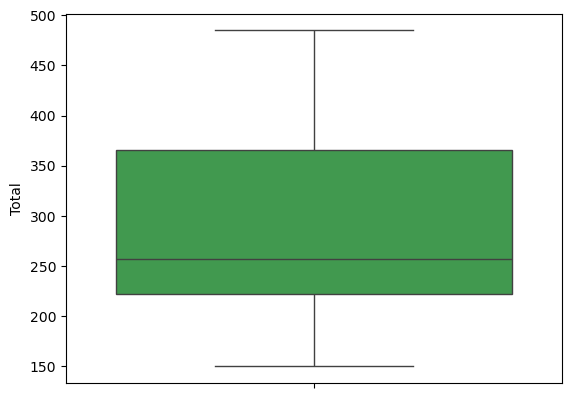

Valor del segundo cuartil (25%): 221.75
Valor del tercer cuartil (75%): 366.00
Valor del rango intercuartil (IQR): 144.25
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 5.38
	 - Límite superior (considerado extremadamente alto): 582.38
Hay 0 outliers en la variable 'Total'


[]

In [53]:
deteccion_outliers(df = df_columnas_, variable = 'Total')

In [56]:
def graficar_boxplot_bivariable_px(df, variable_analisis, variable_categorica):
    # Calcular el orden de las categorías basado en la media de 'variable_analisis' para cada categoría
    orden_categorias = df.groupby(variable_categorica)[variable_analisis].mean().sort_values(ascending=False).index.tolist()

    # Crear el boxplot usando Plotly Express, especificando el orden de las categorías
    fig = px.box(df, x=variable_categorica, y=variable_analisis, color=variable_categorica,
                 category_orders={variable_categorica: orden_categorias})

    # Actualizar títulos del gráfico
    fig.update_layout(title=f'Boxplot de {variable_analisis} por {variable_categorica}',
                      xaxis_title=variable_categorica,
                      yaxis_title=variable_analisis)

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    # Mostrar el gráfico
    fig.show()


In [57]:
graficar_boxplot_bivariable_px (df = df_columnas_orden, variable_analisis = 'Total', variable_categorica = 'País')

Al separar por país vemos gran amplitud pero puede ser por la diferencia de puntuación entre medallistas femeninas y masculinos.

In [58]:
graficar_boxplot_bivariable_px (df = df_columnas_, variable_analisis = 'Total', variable_categorica = 'Genero')

Todos los datos son muy parejos. Al separar por género, compruebo un outlier entre las medallistas y busco el dato para tener más información al respecto. Es rusa y participa en la categoría más alta femenina.

In [60]:
df_columnas_[df_columnas_['Total'] == 331]

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
19,Femenino,+87 kg,2019-04-13,Oro,Tatiana,Kashirina,Rusia,146,185,331


In [62]:
def graficar_barras_porcentaje_px(df, variable_analisis):
    # Contar la frecuencia de la variable de análisis
    volumen = df[variable_analisis].value_counts().reset_index()
    volumen.columns = [variable_analisis, 'Volúmen']

    # Calcular el total y convertir a porcentaje
    total = volumen['Volúmen'].sum()
    volumen['Porcentaje'] = ((volumen['Volúmen'] / total) * 100).round(2)

    # Crear el gráfico de barras
    fig = px.bar(volumen, x=variable_analisis, y='Porcentaje', text='Porcentaje')
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')  # Mostrar como porcentaje
    fig.update_layout(title_text=f'Gráfico de barras: {variable_analisis}',
                      xaxis_title=variable_analisis,
                      yaxis_title='Porcentaje',
                      xaxis={'categoryorder': 'total descending'})

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })
    display(volumen)
    fig.show()

In [63]:
graficar_barras_porcentaje_px(df = df_columnas_, variable_analisis = 'País')

,País,Volúmen,Porcentaje
0,Rusia,20,16.67
1,Armenia,14,11.67
2,Bulgaria,10,8.33
3,Bielorrusia,9,7.50
4,Georgia,9,7.50
5,Turquía,9,7.50
6,Rumania,9,7.50
7,Ucrania,8,6.67
8,Italia,6,5.00
9,Reino Unido,6,5.00


Entre 2019 y 2020 el país con mayor número de medallas es Rusia, con 20 medallas. Le siguen Armenia con 14 y Bulgaria con 10 medallas.

### <span style="color: #2A8E3C;"> ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género) </span>